In [99]:
import glob
import pybrain
import numpy as np
from pybrain.structure import FeedForwardNetwork
from pybrain.structure import LinearLayer, SigmoidLayer
from pybrain.structure import FullConnection
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import random
import ast
import time
import sqlalchemy
from sqlalchemy import *
from sqlalchemy import event
import sqlite3
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import *
import urllib2
import urllib
import json
import glob
import pprint
import dateutil.parser
import pprint
import re
from sklearn import linear_model, datasets
import time
from sklearn.naive_bayes import GaussianNB
import nltk
from collections import defaultdict
from sklearn import svm
pp = pprint.PrettyPrinter(indent=4)
import gevent.monkey
gevent.monkey.patch_socket()
import numpy
import time
import sqlalchemy
from sqlalchemy import *
from sqlalchemy import event
from sqlalchemy.dialects.mysql import LONGTEXT
import sqlite3
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import *
import urllib2
import urllib
import json
import pprint
import dateutil.parser
import gevent
import datetime
import marshal
from pylearn2.datasets.dense_design_matrix import DenseDesignMatrix

from __future__ import division
import os

import pylearn2
import numpy as np
from pylearn2.train import Train
from pylearn2.datasets.mnist import MNIST
from pylearn2.models import softmax_regression, mlp, svm
from pylearn2.training_algorithms import bgd, sgd
from pylearn2.termination_criteria import MonitorBased, EpochCounter
from pylearn2.train_extensions import best_params, live_monitoring
from pylearn2.utils import serial
from pylearn2.costs.mlp.dropout import Dropout
from pylearn2.costs.mlp import WeightDecay
from theano import function
from theano import tensor as T
import cPickle as pickle
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [134]:
with open('oanda.csv', 'r') as datafile:

    timestamps = []
    data = []

    for i, line in enumerate(datafile):
        if i is not 0:
            line = line.strip().split(',')
            timestamp = line[0].strip('"')
            values = [np.float32(x.strip('"')) for x in line[1:4]]
            timestamps.append(timestamp)
            data.append(values)

    data = np.asarray(data[::-1])
    all = data[:, [0]] #gets only the first column, add more with [0,1,2,3,etc] instead of just [0]
    train = all[:3768]
    test = all[3769:]

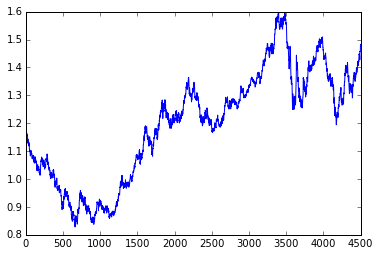

In [97]:
plt.plot(all.ravel()[:])

In [92]:
def stationarize(data):
    minusone = data[1:]
    stationary = np.log(minusone/data[:-1])
    return stationary
train_s = stationarize(train)
test_s = stationarize(test)
all_s = stationarize(all)

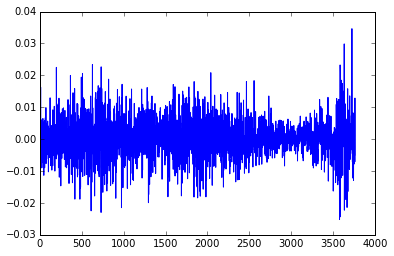

In [214]:
plt.plot(train_s.ravel()[:])

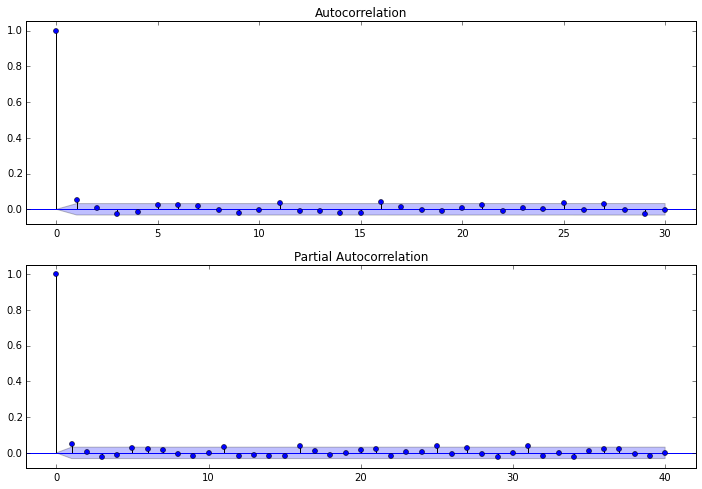

In [215]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_s.ravel(), lags=30, ax=ax1) # autocorrelation
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_s.ravel(), lags=40, ax=ax2) #Partial Autocorrelation

In [216]:
arma_mod10 = sm.tsa.ARMA(train_s.ravel()[:], (5,5)).fit()
arma_mod100 = sm.tsa.ARMA(train_s.ravel()[:], (1,0)).fit()
print(arma_mod10.params)
print(arma_mod100.params)

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [200]:
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)
print(arma_mod100.aic, arma_mod100.bic, arma_mod100.hqic)

-3964.43034693 -3951.78652264 -3959.46893094
-3961.82056639 -3911.24526921 -3941.97490242


In [201]:
sm.stats.durbin_watson(arma_mod10.resid)

1.924737721320456

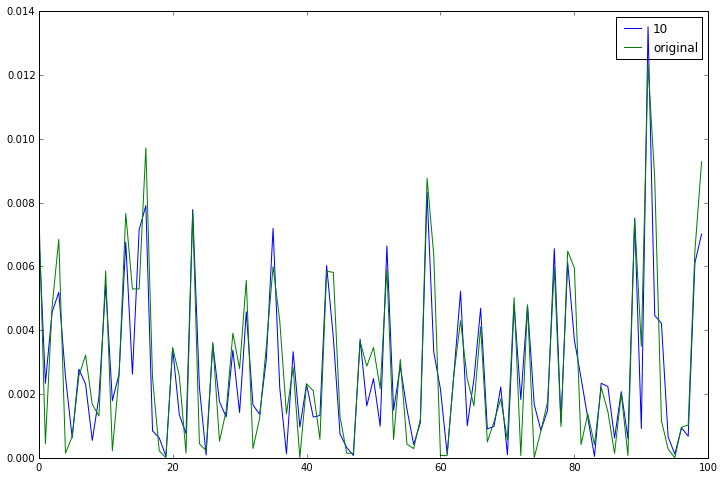

In [213]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.plot(np.abs(arma_mod10.resid[-100:]), label='10')
#plt.plot(np.abs(arma_mod100.resid[-100:]), label='100')
plt.plot(np.abs(all_s.ravel()[-100:]), label='original')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [212]:
print(np.abs(all_s.ravel()[-500:]).sum())
print(np.abs(arma_mod10.resid.ravel()[-500:]).sum())
print(np.abs(arma_mod100.resid.ravel()[-500:]).sum())

1.78342
1.7374770163
1.72338787086


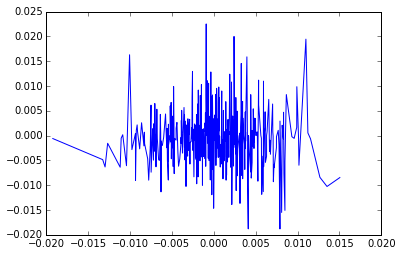

In [209]:

fig = plt.plot(np.sort(arma_mod10.resid.ravel()), all_s.ravel()[:500])

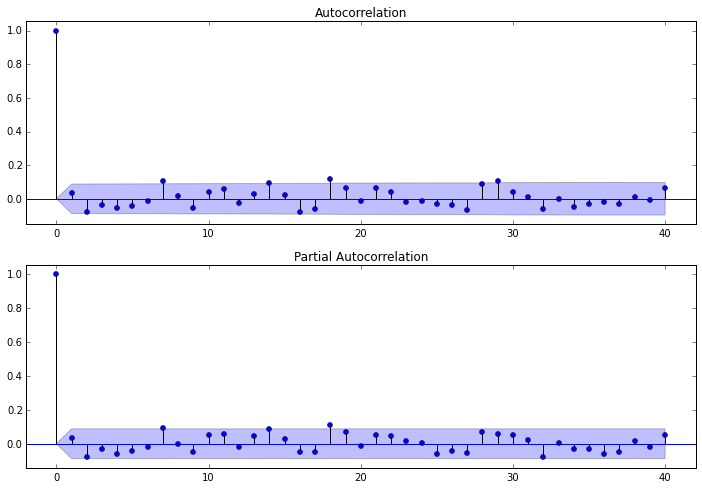

In [210]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_mod10.resid.ravel(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod10.resid.ravel(), lags=40, ax=ax2)

In [44]:
X_train = []
Y_train = []

X_test = []
Y_test = []




X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

def normalize_up_down(x, y):
    samples = zip(x, y)
    numpy.random.shuffle(samples)
    up = []
    down = []
    for item in samples:
        if item[1][0] > 0:
            up.append(item)
        elif item[1][0] < 0:
            down.append(item)
    min_length = min(len(up), len(down))
    out = up[:min_length] + down[:min_length]
    numpy.random.shuffle(out)
    return zip(*out)


X_train, Y_train = normalize_up_down(X_train, Y_train)
X_test, Y_test = normalize_up_down(X_test, Y_test)

X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

Y_train = Y_train * 10000
Y_test = Y_test * 10000

In [4]:
print len(X_train)
print len(Y_train)
print len(X_test)
print len(Y_test)

3418
3418
350
350


In [5]:
print np.shape(X_train)
print np.shape(Y_train)

print np.shape(X_test)
print np.shape(Y_test)

(3418, 9)
(3418, 1)
(350, 9)
(350, 1)


In [45]:

train = DenseDesignMatrix(X=X_train, y=Y_train)
valid = DenseDesignMatrix(X=X_test[::5], y=Y_test[::5])
train_monitor = DenseDesignMatrix(X=X_train[::5], y=Y_train[::5])

In [8]:
monitor = live_monitoring.LiveMonitoring()
firstrun = True

In [ ]:
if not firstrun:
    model.monitor.disable_logging()

firstrun = False
monitor.req_sock.close()
monitor.pub_sock.close()
monitor = live_monitoring.LiveMonitoring()

h0 = mlp.Sigmoid(layer_name='h0', dim=400, irange=.05) #9
h1 = mlp.Sigmoid(layer_name='h1', dim=400, irange=.05) #18
ylayer = mlp.Linear(layer_name='y', dim=1, irange=.05)

layers = [h0, h1, ylayer]
model = mlp.MLP(layers, nvis=9)

monitoring = dict(valid=valid, train=train_monitor)
termination = EpochCounter(10000)
extensions = [monitor]

algorithm = sgd.SGD(.001, batch_size=100, #cost=Dropout(.8),
                     monitoring_dataset = monitoring, termination_criterion = termination)

train_job = Train(train, model, algorithm, extensions=extensions)


train_job.main_loop()

In [31]:
with open(r"zackmodel2.pickle", "wb") as output_file:
    pickle.dump(model, output_file)

In [144]:
with open(r"zackmodelc.pickle", "rb") as output_file:
    model = pickle.load(output_file)

IOError: [Errno 9] Bad file descriptor

In [34]:
import copy

X = T.matrix()
X = model.get_input_space().make_theano_batch()
Y = model.fprop(X)
f = function([X], Y)

def compare(x, y, set_name, shuffle=False):
    x = copy.deepcopy(x)
    y = copy.deepcopy(y)
    if shuffle:
        numpy.random.shuffle(y)
    test = f(x)

    comparison = zip(y, test)

    print set_name
    for i in range(1):
        right = 0
        for row in comparison:
            if float(row[0][i]) * float(row[1][i]) > 0:
                right += 1
        print right/float(len(x))
        
compare(X_train, Y_train, "training set")
compare(X_test, Y_test, "test set")
compare(X_train, Y_train,  "training set", True)
compare(X_test, Y_test, "test set", True)

training set
0.5
test set
0.5
training set
0.5
test set
0.5


In [85]:
ben;s
Training set
0.518590998043
0.526139222812
0.51607492312
test set
0.0542353927873
0.0539558289069
0.0567514677104

SyntaxError: invalid syntax (<ipython-input-85-5a7ccd4f90b6>, line 2)

In [ ]:
random
0.477774671512
0.476376852111
0.474326716988

0.519280205656
0.517994858612
0.510711225364

In [154]:
up = 0
down = 0

for x in range(0, 1):
    for row in Y_train:

        if float(row[x]) > 0:
            up += 1
        else:
            down += 1


    print up /(down + up)
    
up = 0
down = 0

for x in range(0, 1):
    for row in Y_test:

        if float(row[x]) > 0:
            up += 1
        else:
            down += 1


    print up /(down + up)

0.5
0.5


In [48]:
import copy

X = T.matrix()
X = model.get_input_space().make_theano_batch()
Y = model.fprop(X)
f = function([X], Y)

def compare(x, y, set_name, shuffle=False):
    x = copy.deepcopy(x)
    y = copy.deepcopy(y)
    if shuffle:
        numpy.random.shuffle(y)
    test = f(x)

    comparison = zip(y, test)
    numpy.random.shuffle(comparison)
    print set_name
    for i in range(1):
        right = 0
        for row in comparison:
            print row[0][i] , row[1][i]
            if float(row[0][i]) * float(row[1][i]) >= 0:
                right += 1
        print right/float(len(x))
        
compare(X_test, Y_test, "test set")

test set
13.0 0.0442116
15.0 0.0442635
-4.0 0.0442605
0.8 0.0441946
-10.1 0.0441494
-2.0 0.0442702
3.6 0.0441517
-3.0 0.0441133
-5.0 0.0441454
3.6 0.0441767
7.0 0.0442566
14.0 0.0441935
16.0 0.0441824
-3.0 0.0442591
-14.0 0.0441659
23.0 0.0441274
-7.0 0.0440848
8.0 0.0441587
-3.0 0.0440734
-7.5 0.0441959
-2.0 0.0441687
2.5 0.0441367
-7.0 0.0441941
1.9 0.0441543
-1.0 0.0441918
-2.7 0.0442283
-9.0 0.0440423
1.0 0.0442788
-30.0 0.0439829
-5.0 0.0442195
-4.0 0.0442209
4.0 0.0441351
2.0 0.0441611
18.8 0.0441827
-12.0 0.044165
-3.0 0.0442467
-2.0 0.0439934
-11.0 0.0441413
16.0 0.0441942
2.0 0.0441681
7.1 0.0441967
-1.0 0.0441165
1.3 0.044179
5.0 0.0441355
-10.0 0.0442595
-8.0 0.0440662
-1.7 0.0441614
-9.7 0.0441512
4.6 0.0441411
9.0 0.0442101
74.0 0.0441366
15.0 0.0442519
20.0 0.0441996
-1.0 0.0441824
-5.0 0.0440073
-6.0 0.0440683
14.8 0.0443168
-1.0 0.0442654
9.0 0.0441825
3.0 0.0441502
3.7 0.044195
-15.6 0.0442085
3.2 0.0441423
-3.0 0.044272
-8.0 0.0440116
-3.0 0.0440861
-0.4 0.0441553
-5.

In [ ]:
#monitoring = dict(valid=valid)
monitoring = dict()
#termination = MonitorBased(channel_name="valid_y_misclass", N=100)
termination = EpochCounter(10)
#extensions = [best_params.MonitorBasedSaveBest(channel_name="valid_y_misclass",
#save_path="train_best.pkl"), monitor]
extensions = [monitor]


algorithm = sgd.SGD(0.1, batch_size=100, cost=Dropout(),
                    monitoring_dataset = monitoring, termination_criterion = termination)

save_path = "train_bes3t.pkl"
#if os.path.exists(save_path):
#    model = serial.load(save_path)
#else:
#    print 'Running training'
#    train_job = Train(train, model, algorithm, extensions=extensions, save_path="train.pkl", save_freq=1)
#    train_job.main_loop()

train_job = Train(train, model, algorithm, extensions=extensions, save_path="train.pkl", save_freq=1)
train_job.main_loop()


#X = model.get_input_space().make_batch_theano()
#Y = model.fprop(X)

#y = T.argmax(Y, axis=1)
#f = function([X], y)
#yhat = f(test.X)

#y = np.where(test.get_targets())[1]
#print 'accuracy', (y==yhat).sum() / y.size